<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

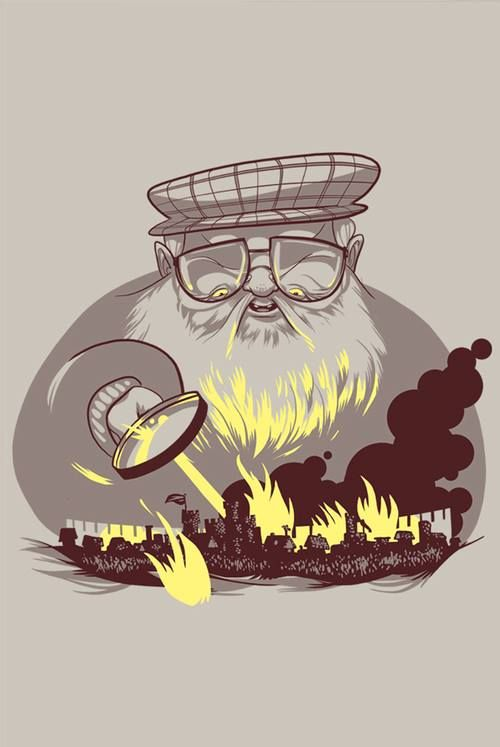

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [327]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 43.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 61.4MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [329]:
train_data = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')
test_data = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [330]:
print(len(train_data))
print(len(test_data))

1557
389


In [331]:
train_data.dtypes

,0
name,object
title,object
male,int64
culture,object
dateOfBirth,float64
mother,object
father,object
heir,object
house,object
spouse,object


In [332]:
train_data.describe()

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
count,1557.000000,279.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,18.000000,22.000000,21.000000,200.00000,1557.000000,1557.000000,279.000000,1557.000000,1557.000000,1557.000000
mean,0.590880,247.551971,0.138728,0.327553,0.431599,0.562620,0.330122,0.666667,0.227273,0.666667,0.79000,0.128452,0.439306,35.290323,0.187540,0.062400,0.778420
std,0.491829,61.550441,0.345774,0.469472,0.495458,0.496223,0.470408,0.485071,0.428932,0.483046,0.40833,0.334700,0.496462,26.364864,1.114648,0.121416,0.415443
min,0.000000,-25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,241.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,16.000000,0.000000,0.013378,1.000000
50%,1.000000,272.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000,24.000000,0.000000,0.023411,1.000000
75%,1.000000,286.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,0.000000,1.000000,49.000000,0.000000,0.063545,1.000000
max,1.000000,299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000


In [333]:
train_data.isna().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [334]:
test_data.isna().sum()

,0
name,0
title,168
male,0
culture,200
dateOfBirth,235
mother,386
father,385
heir,387
house,46
spouse,313


In [335]:
#train_data = train_data.drop(columns=['mother', 'father', 'heir', 'isAliveMother', 'isAliveFather', 'isAliveHeir'])
#test_data = test_data.drop(columns=['mother', 'father', 'heir', 'isAliveMother', 'isAliveFather', 'isAliveHeir'])

train_data = train_data.drop(columns=['mother', 'father', 'heir'])
test_data = test_data.drop(columns=['mother', 'father', 'heir'])

In [336]:
title_mode = train_data['title'].dropna().mode()[0]
culture_mode = train_data['culture'].dropna().mode()[0]
date_of_birth_mean = train_data['dateOfBirth'].dropna().mean()
house_mode = train_data['house'].dropna().mode()[0]
spouse_mode = train_data['spouse'].dropna().mode()[0]
is_alive_spouse_mode = train_data['isAliveSpouse'].dropna().mode()[0]
age_mean = train_data['age'].dropna().mean()

In [337]:
train_data['title'] = train_data['title'].fillna(title_mode)
train_data['culture'] = train_data['culture'].fillna(culture_mode)
train_data['dateOfBirth'] = train_data['dateOfBirth'].fillna(date_of_birth_mean)
train_data['house'] = train_data['house'].fillna(house_mode)
train_data['spouse'] = train_data['spouse'].fillna(spouse_mode)
train_data['isAliveSpouse'] = train_data['isAliveSpouse'].fillna(is_alive_spouse_mode)
train_data['age'] = train_data['age'].fillna(age_mean)

train_data['isAliveMother'] = train_data['isAliveMother'].fillna(train_data['isAliveMother'].dropna().mode()[0])
train_data['isAliveFather'] = train_data['isAliveFather'].fillna(train_data['isAliveFather'].dropna().mode()[0])
train_data['isAliveHeir'] = train_data['isAliveHeir'].fillna(train_data['isAliveHeir'].dropna().mode()[0])
print()

In [338]:
train_data.isna().sum()

,0
name,0
title,0
male,0
culture,0
dateOfBirth,0
house,0
spouse,0
book1,0
book2,0
book3,0


In [339]:
title_mode = test_data['title'].dropna().mode()[0]
culture_mode = test_data['culture'].dropna().mode()[0]
date_of_birth_mean = test_data['dateOfBirth'].dropna().mean()
house_mode = test_data['house'].dropna().mode()[0]
spouse_mode = test_data['spouse'].dropna().mode()[0]
is_alive_spouse_mode = test_data['isAliveSpouse'].dropna().mode()[0]
age_mean = test_data['age'].dropna().mean()

In [340]:
test_data['title'] = test_data['title'].fillna(title_mode)
test_data['culture'] = test_data['culture'].fillna(culture_mode)
test_data['dateOfBirth'] = test_data['dateOfBirth'].fillna(date_of_birth_mean)
test_data['house'] = test_data['house'].fillna(house_mode)
test_data['spouse'] = test_data['spouse'].fillna(spouse_mode)
test_data['isAliveSpouse'] = test_data['isAliveSpouse'].fillna(is_alive_spouse_mode)
test_data['age'] = test_data['age'].fillna(age_mean)

test_data['isAliveMother'] = test_data['isAliveMother'].fillna(test_data['isAliveMother'].dropna().mode()[0])
test_data['isAliveFather'] = test_data['isAliveFather'].fillna(test_data['isAliveFather'].dropna().mode()[0])
test_data['isAliveHeir'] = test_data['isAliveHeir'].fillna(test_data['isAliveHeir'].dropna().mode()[0])
print()

In [341]:
test_data.isna().sum()

,0
name,0
title,0
male,0
culture,0
dateOfBirth,0
house,0
spouse,0
book1,0
book2,0
book3,0


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [342]:
train_data['isPopular'] = (train_data['popularity'] > 0.5).astype(int)
train_data['boolDeadRelations'] = (train_data['numDeadRelations'] > 0).astype(int)

test_data['isPopular'] = (test_data['popularity'] > 0.5).astype(int)
test_data['boolDeadRelations'] = (test_data['numDeadRelations'] > 0).astype(int)

In [343]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [344]:
replacement_dict = {value: key for key, values in cult.items() for value in values}

In [345]:
train_data['culture'] = train_data['culture'].replace(replacement_dict)
test_data['culture'] = test_data['culture'].replace(replacement_dict)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [346]:
train_data.drop(columns=['name', 'numDeadRelations', 'popularity'], inplace = True)
test_data.drop(columns=['name', 'numDeadRelations', 'popularity'], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

Text(0.5, 1.0, 'Balance of the target')

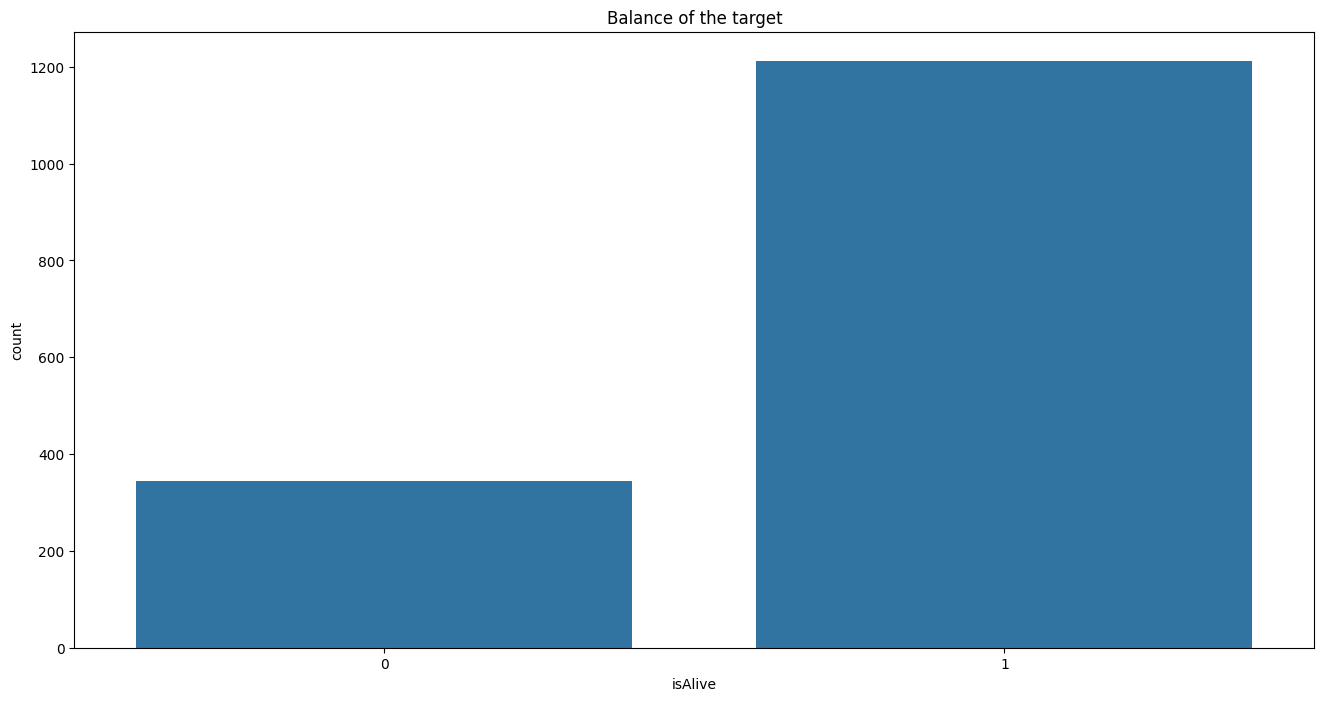

In [347]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.countplot(train_data, x='isAlive', ax=ax)
ax.set_title("Balance of the target")

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [348]:
cat_cols = train_data.select_dtypes('object').columns
cat_cols

Index(['title', 'culture', 'house', 'spouse'], dtype='object')

In [349]:
num_cols = train_data.select_dtypes(['int64', 'float64']).columns
num_cols

Index(['male', 'dateOfBirth', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'isAlive', 'isPopular',
       'boolDeadRelations'],
      dtype='object')

In [350]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

one_hot_encoded = encoder.fit_transform(train_data[cat_cols])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(cat_cols), index=train_data.index
                          )

one_hot_encoded_test = encoder.transform(test_data[cat_cols])
one_hot_df_test = pd.DataFrame(one_hot_encoded_test, columns=encoder.get_feature_names_out(cat_cols), index=test_data.index
                          )

In [351]:
train_data_encoded = pd.concat([train_data, one_hot_df], axis=1)

train_data_encoded = train_data_encoded.drop(cat_cols, axis=1)

train_data_encoded.head()

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,...,spouse_Viserys I Targaryen,spouse_Walder Frey,spouse_Walter Whent,spouse_Walton Frey,spouse_Whalen Frey,spouse_Wylis Manderly,spouse_Wynafrei Whent,spouse_Yandry,spouse_Ynys Yronwood,spouse_Zhoe Blanetree
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,247.551971,0,0,0,0,0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,208.000000,1,1,1,1,1,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,247.551971,0,0,0,1,0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,82.000000,0,0,0,0,0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,276.000000,0,0,0,1,0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [352]:
test_data_encoded = pd.concat([test_data, one_hot_df_test], axis=1)

test_data_encoded = test_data_encoded.drop(cat_cols, axis=1)

test_data_encoded.head()

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,...,spouse_Viserys I Targaryen,spouse_Walder Frey,spouse_Walter Whent,spouse_Walton Frey,spouse_Whalen Frey,spouse_Wylis Manderly,spouse_Wynafrei Whent,spouse_Yandry,spouse_Ynys Yronwood,spouse_Zhoe Blanetree
S.No,,,,,,,,,,,,,,,,,,,,,
1558,0,156.000000,0,0,0,0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1559,0,3986.571429,0,1,1,1,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1560,0,3986.571429,0,0,1,1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1561,1,3986.571429,1,1,1,1,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1562,1,262.000000,1,1,1,1,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

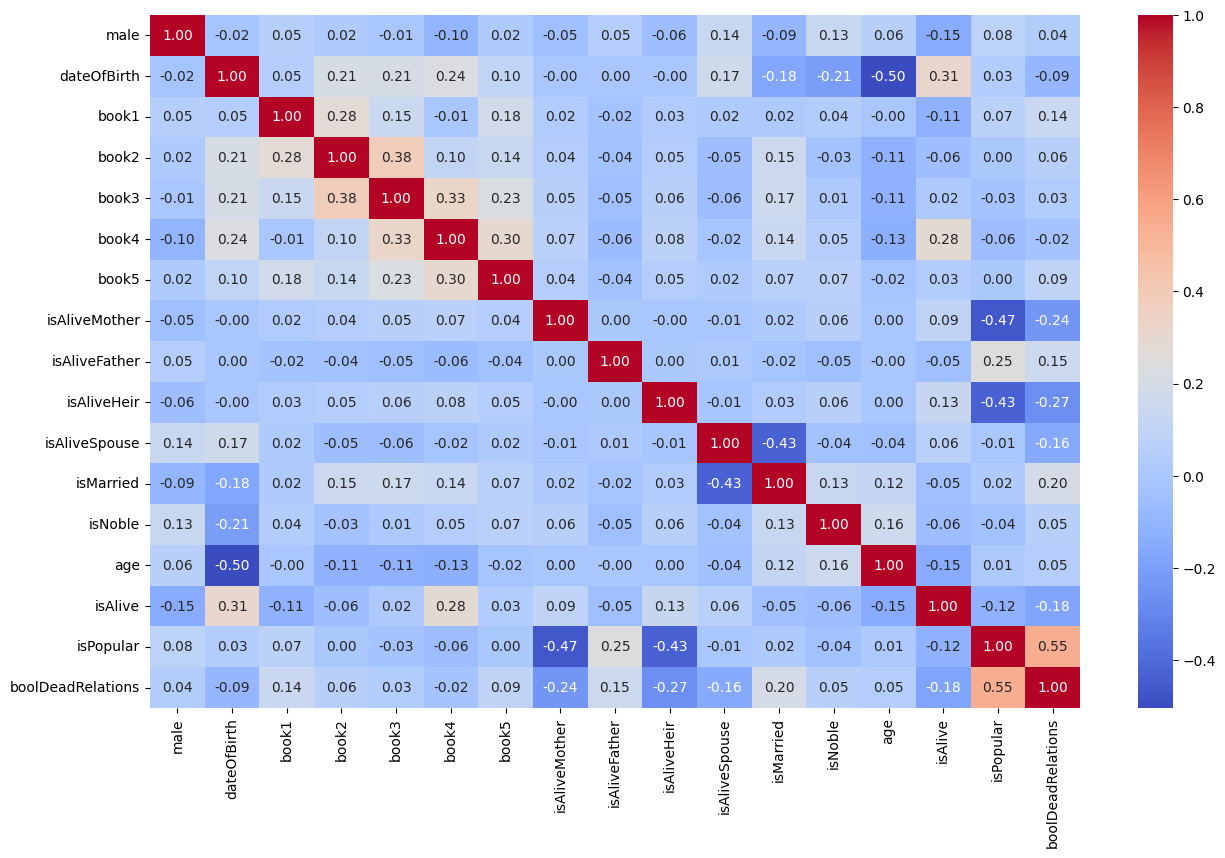

In [353]:
plt.figure(figsize=(15, 9))
sns.heatmap(np.corrcoef(train_data[num_cols].values.T), annot=True, fmt=".2f", cmap='coolwarm', xticklabels=num_cols, yticklabels=num_cols)

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

<ipython-input-354-bb1f339c4b70>:25: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(labels, loc='upper right', title='Legend', labels=labels, bbox_to_anchor=(1, 0.9), fontsize=12)


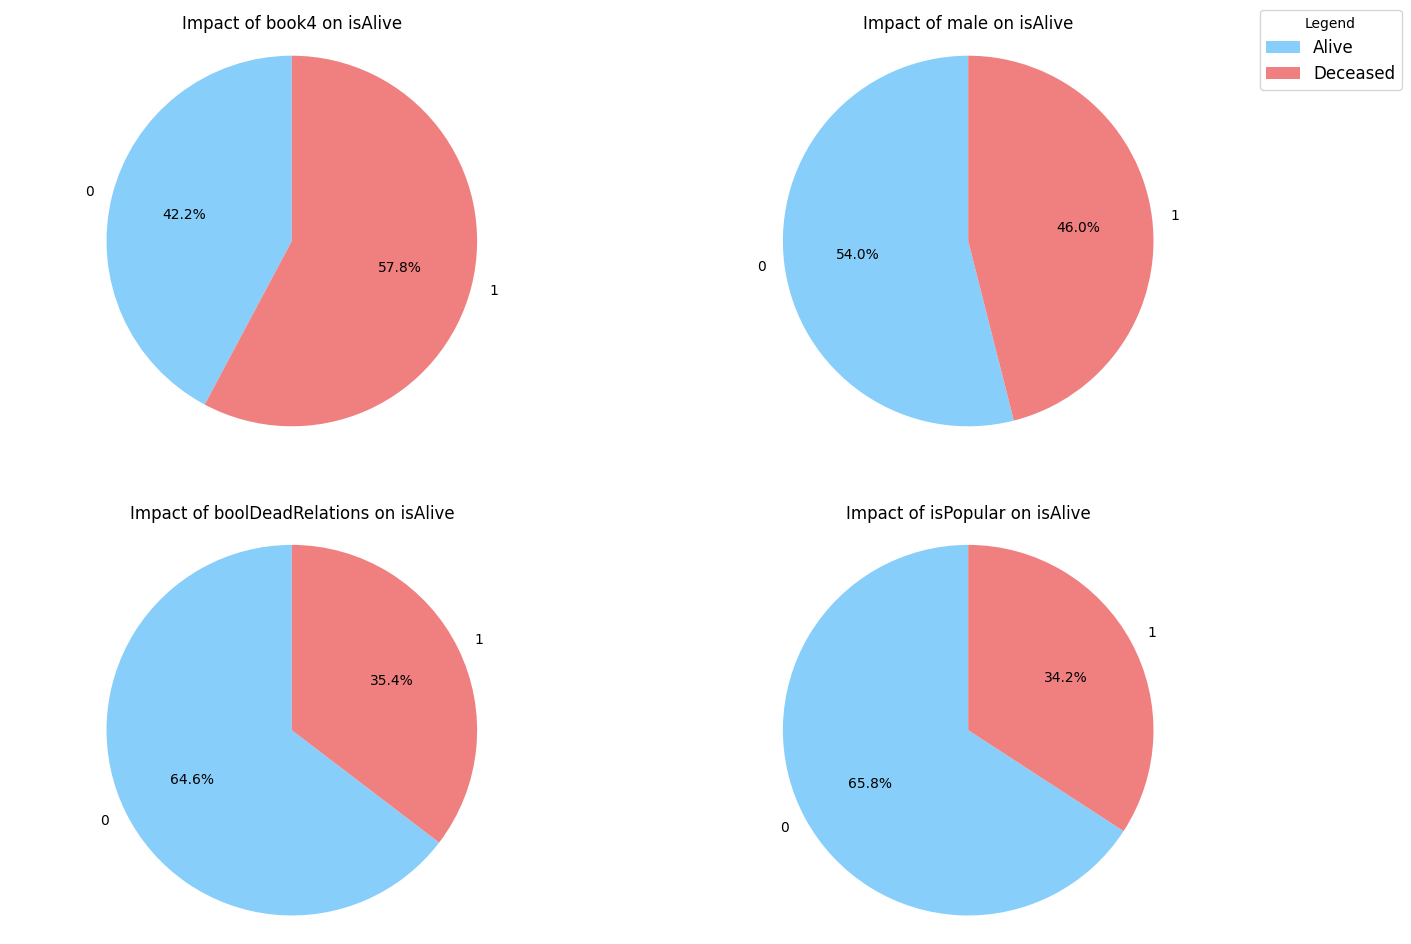

In [354]:
# Признаки, которые будем анализировать
features = ['book4', 'male', 'boolDeadRelations', 'isPopular']

fig, axs = plt.subplots(3, 2, figsize=(16, 18))

axs = axs.ravel()

colors = {1: 'lightskyblue', 0: 'lightcoral'}
labels = ['Alive', 'Deceased']

for i, feature in enumerate(features):
    feature_alive = train_data.groupby([feature, 'isAlive']).size().unstack().fillna(0)

    feature_alive_percent = feature_alive.div(feature_alive.sum(axis=1), axis=0) * 100

    wedges, texts, autotexts = axs[i].pie(feature_alive_percent[1],
                                          labels=feature_alive_percent.index,
                                          autopct='%1.1f%%',
                                          startangle=90,
                                          colors=[colors[1], colors[0]])

    axs[i].axis('equal')
    axs[i].set_title(f'Impact of {feature} on isAlive')

fig.legend(labels, loc='upper right', title='Legend', labels=labels, bbox_to_anchor=(1, 0.9), fontsize=12)

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [355]:
X = train_data_encoded.drop(columns=['isAlive'])
y = train_data_encoded['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [356]:
from sklearn.model_selection import train_test_split

In [357]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [358]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [359]:
scaler = StandardScaler()
scaler.fit(test_data_encoded)
test_data_scaled = scaler.transform(test_data_encoded)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [360]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [361]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [275]:
from catboost import CatBoostClassifier, Pool

In [281]:
X_train, X_test, y_train, y_test = train_test_split(train_data.drop(columns=['isAlive']), train_data['isAlive'], test_size=0.2, shuffle=True)

In [282]:
cat_features = ['title', 'culture', 'house', 'spouse']
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, cat_features=cat_features)

In [283]:
model.fit(X_train, y_train)

0:	learn: 0.6499244	total: 3.42ms	remaining: 3.41s
1:	learn: 0.6173313	total: 7.5ms	remaining: 3.74s
2:	learn: 0.5817219	total: 13.2ms	remaining: 4.4s
3:	learn: 0.5594907	total: 18.7ms	remaining: 4.66s
4:	learn: 0.5420684	total: 24.5ms	remaining: 4.87s
5:	learn: 0.5253616	total: 29.7ms	remaining: 4.92s
6:	learn: 0.5080692	total: 36.1ms	remaining: 5.13s
7:	learn: 0.4949701	total: 41.3ms	remaining: 5.12s
8:	learn: 0.4824339	total: 46.9ms	remaining: 5.16s
9:	learn: 0.4700815	total: 52.6ms	remaining: 5.21s
10:	learn: 0.4641052	total: 58ms	remaining: 5.21s
11:	learn: 0.4620266	total: 60ms	remaining: 4.94s
12:	learn: 0.4581004	total: 65.5ms	remaining: 4.97s
13:	learn: 0.4512922	total: 71.5ms	remaining: 5.04s
14:	learn: 0.4468883	total: 76.7ms	remaining: 5.04s
15:	learn: 0.4435943	total: 82.3ms	remaining: 5.06s
16:	learn: 0.4401340	total: 88.4ms	remaining: 5.11s
17:	learn: 0.4377253	total: 92.2ms	remaining: 5.03s
18:	learn: 0.4330977	total: 104ms	remaining: 5.39s
19:	learn: 0.4283279	total: 1

In [284]:
preds = model.predict(X_test)

In [285]:
accuracy_cat = accuracy_score(y_test, preds)
print("Accuracy : %.4f" % accuracy_cat)

Accuracy : 0.8397


In [362]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1, solver='saga')

# Шаг 2. обучение модели
logistic_regression.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [363]:
# Шаг 1. создание модели
ada_boost = AdaBoostClassifier(n_estimators=200, learning_rate=0.1)

# Шаг 2. обучение модели
ada_boost.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_ada = ada_boost.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [364]:
rfc = RandomForestClassifier(n_estimators=200)

rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=200)

In [365]:
gnb = GaussianNB()

gnb.fit(X_train_scaled, y_train)

GaussianNB()

In [366]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=10)

In [367]:
svc = SVC()

svc.fit(X_train_scaled, y_train)

SVC()

In [368]:
dtc = DecisionTreeClassifier(max_depth=50)

dtc.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=50)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [325]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [369]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7949


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [370]:
# Шаг 3. Предсказание на тестовых данных
y_pred_ada = ada_boost.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("Accuracy : %.4f" % accuracy_ada)

Accuracy : 0.7949


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


In [371]:
y_pred_rfc = rfc.predict(X_test)

accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print("Accuracy : %.4f" % accuracy_rfc)

Accuracy : 0.7949


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [372]:
y_pred_gnb = gnb.predict(X_test)

accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print("Accuracy : %.4f" % accuracy_gnb)

Accuracy : 0.4231


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [373]:
y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy : %.4f" % accuracy_knn)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Accuracy : 0.7981


In [374]:
y_pred_svc = svc.predict(X_test)

accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Accuracy : %.4f" % accuracy_svc)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Accuracy : 0.7949


In [375]:
y_pred_dtc = dtc.predict(X_test)

accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print("Accuracy : %.4f" % accuracy_dtc)

Accuracy : 0.7756


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Выберите лучшую модель.

In [286]:
test_pred = model.predict(test_data)

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [287]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 7.07MB/s]


In [288]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [289]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


In [290]:
submission['isAlive'] = test_pred

Как сохранить измененный Pandas DataFrame в csv файл:

In [291]:
submission.to_csv("/content/new_submission.csv", index=False)